In [50]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [51]:

df=pd.read_csv("F:\Assignment\Csv\wine_dataUC.csv",names=['Class','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline'])
print(df.shape)
df.head()

(178, 14)


,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
4,1,13.24,2.59,2.87,21,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
df.describe()  # high level statistics about data

,Class,alcohol,malic_acid,ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,175.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,99.771429,2.295112,2.029270,0.361854,1.590899,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,14.403236,0.625851,0.998859,0.124453,0.572359,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,70.000000,0.980000,0.340000,0.130000,0.410000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,88.000000,1.742500,1.205000,0.270000,1.250000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,98.000000,2.355000,2.135000,0.340000,1.555000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,107.500000,2.800000,2.875000,0.437500,1.950000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,162.000000,3.880000,5.080000,0.660000,3.580000,1.710000,4.000000,1680.000000


In [53]:
df.info() # datatypes of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             175 non-null    object 
 5   magnesium                     175 non-null    float64
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    object 
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

<AxesSubplot:xlabel='alcalinity_of_ash', ylabel='count'>

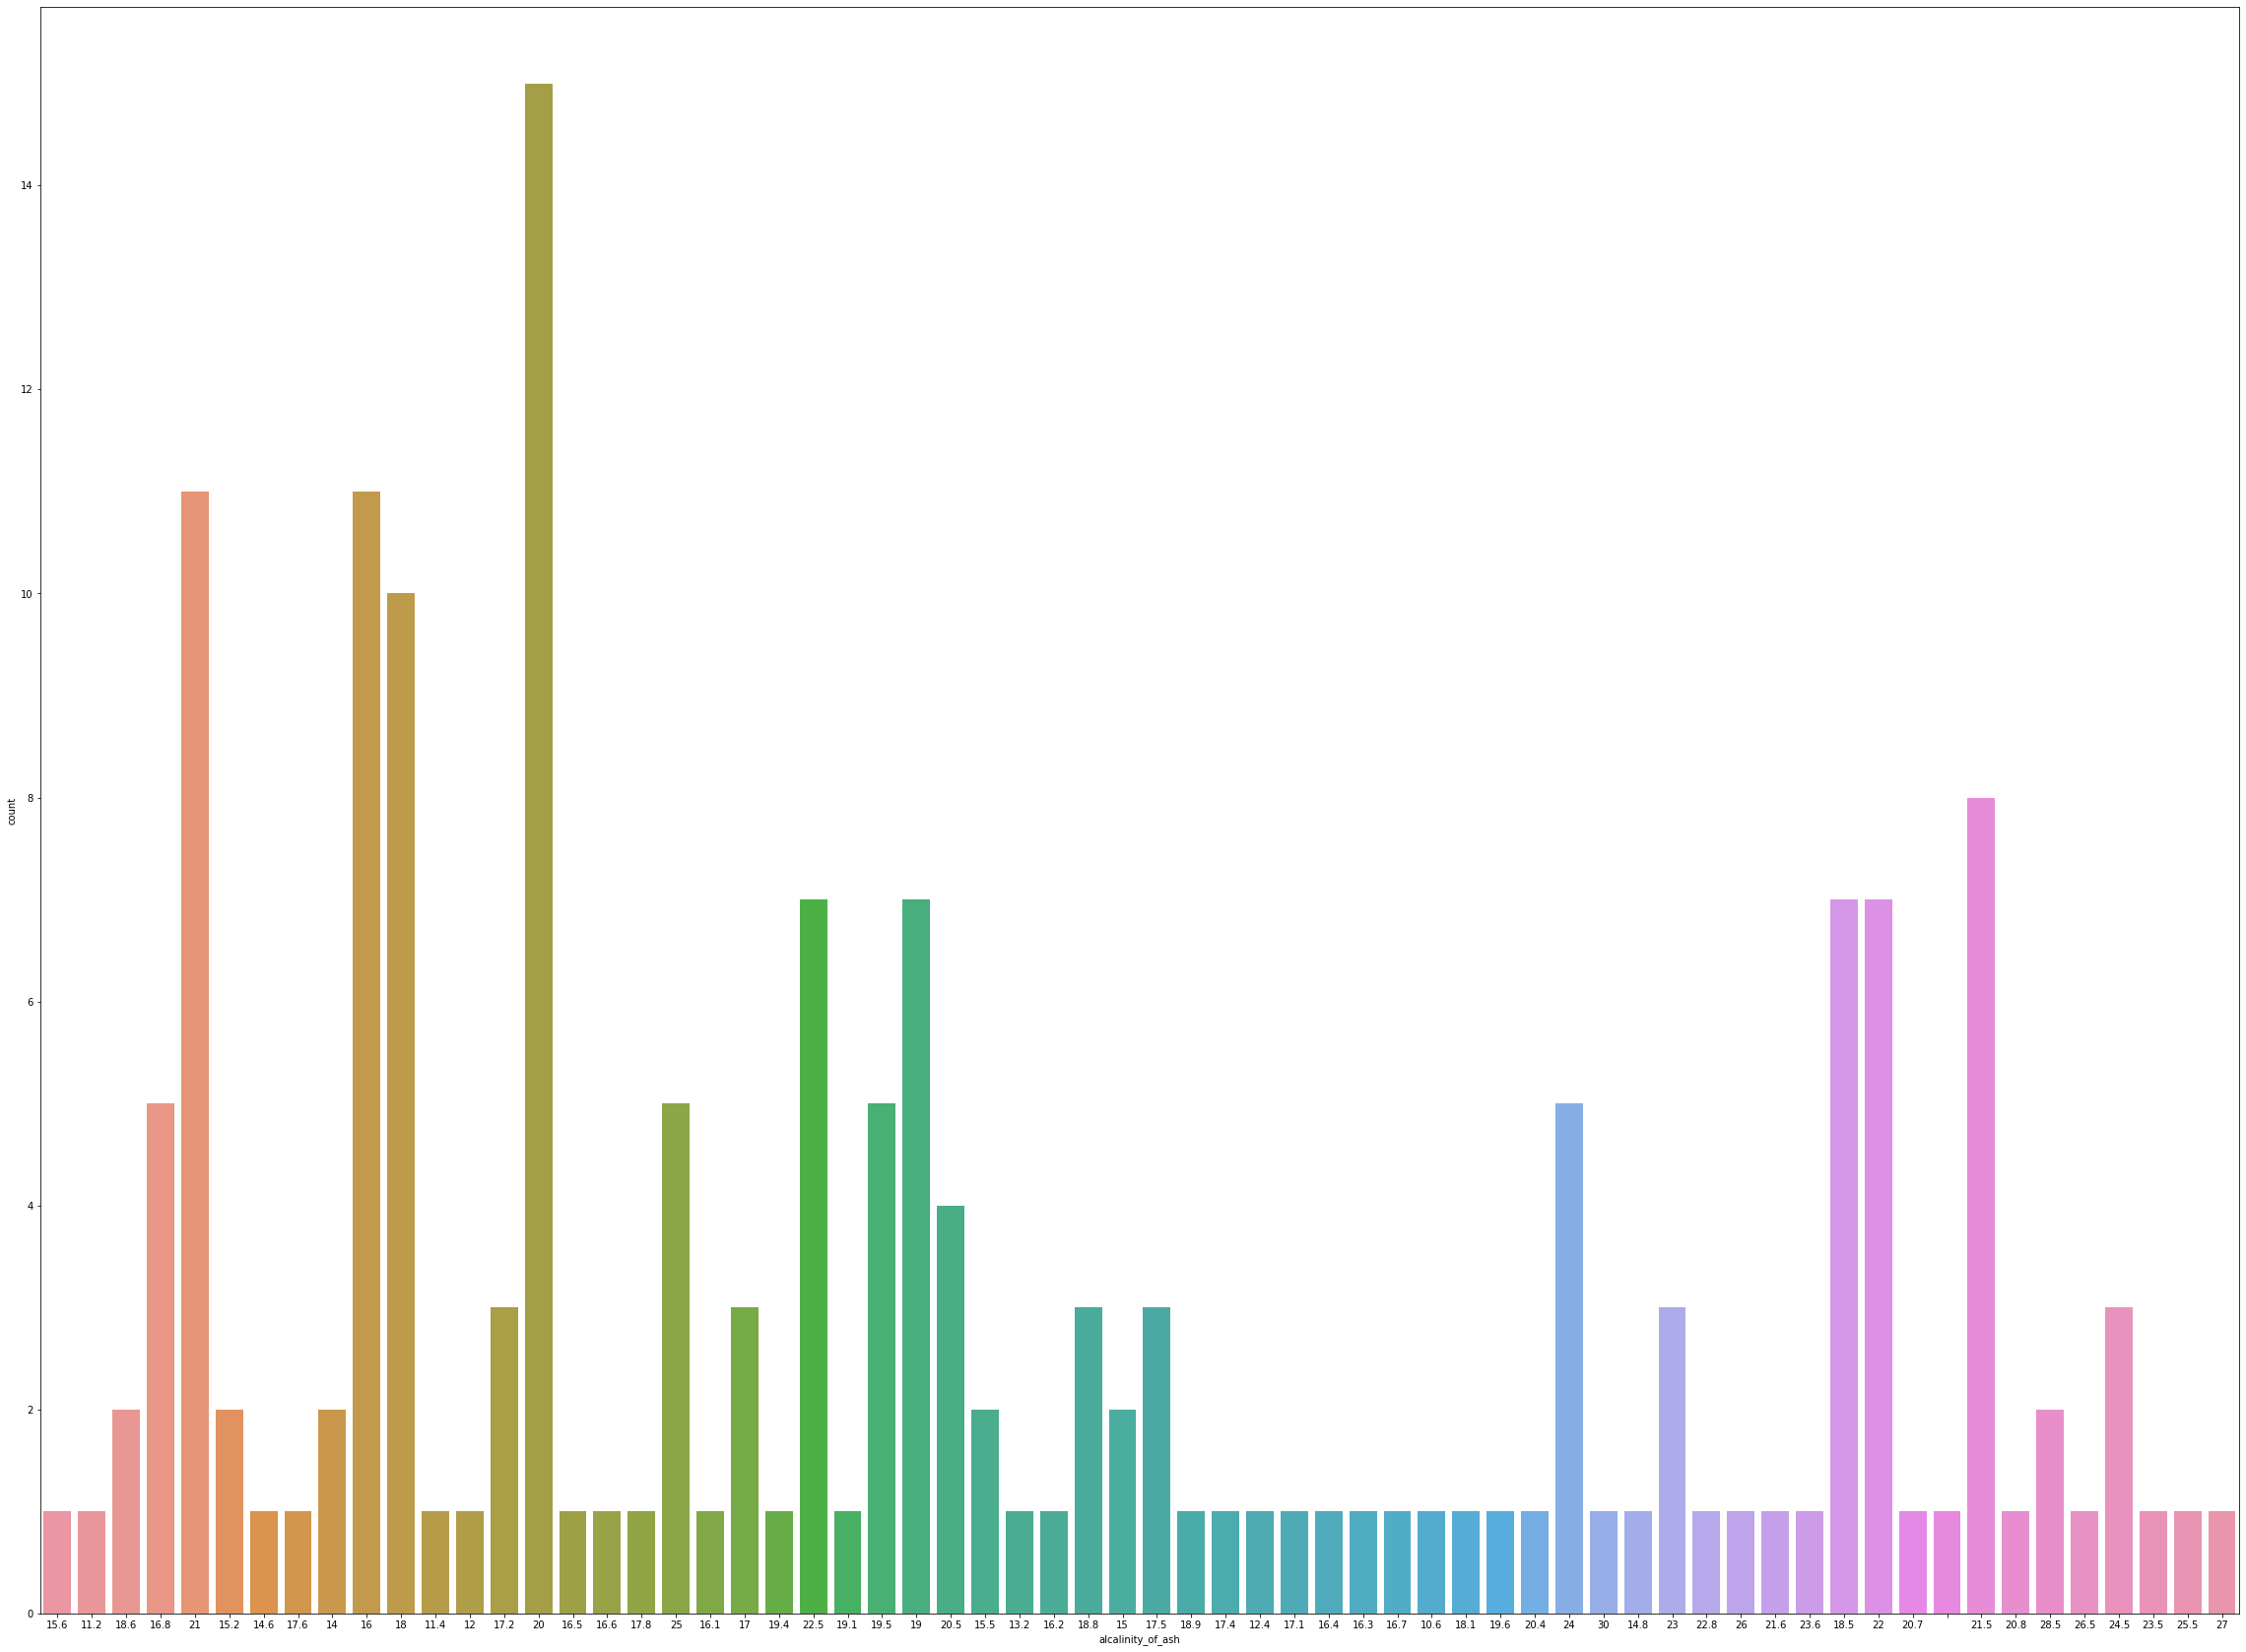

In [54]:
plt.figure(figsize=(40,30))
sns.countplot(df['alcalinity_of_ash'],orient='h')





<AxesSubplot:xlabel='color_intensity', ylabel='count'>

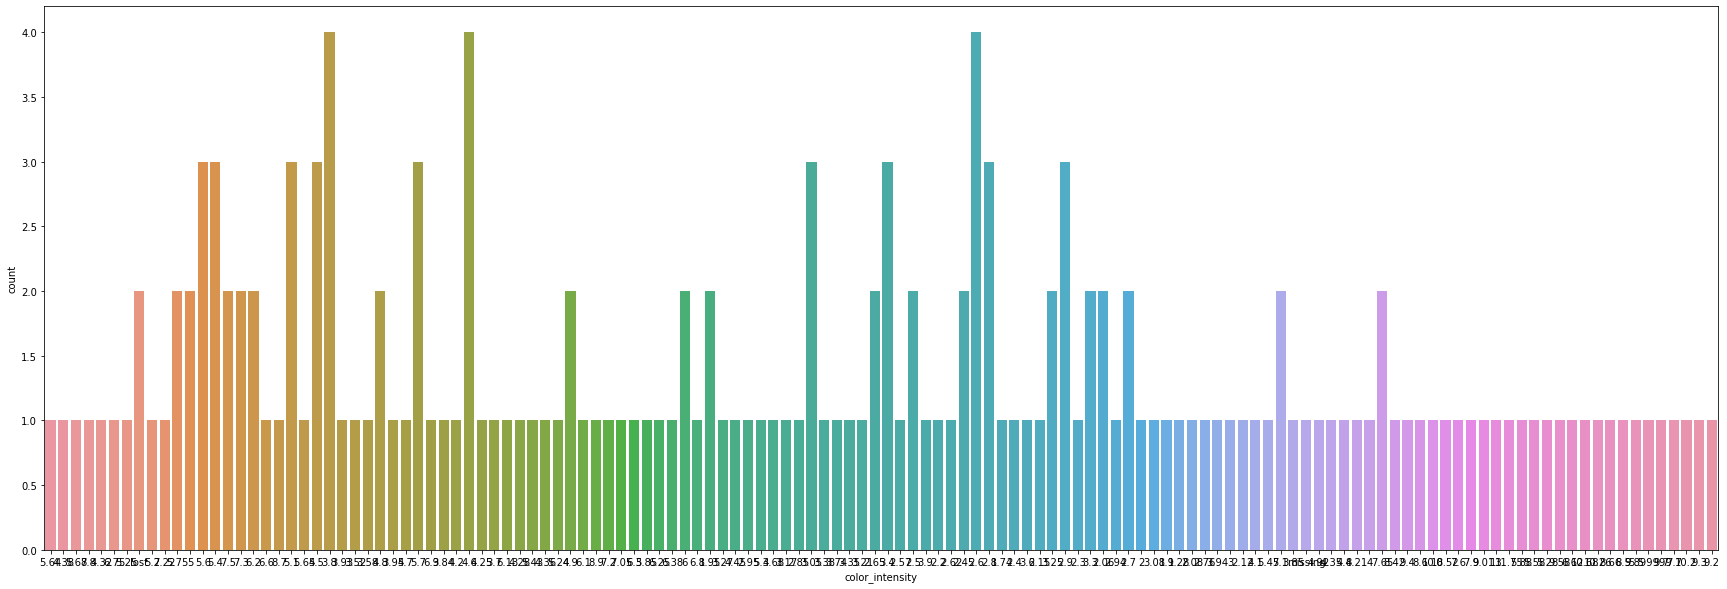

In [55]:
plt.figure(figsize=(30,10))
sns.countplot(df['color_intensity'])

In [56]:
# Checking for null values
df.isnull().mean()
# Two features contains null values

Class                           0.000000
alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.016854
magnesium                       0.016854
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.000000
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
dtype: float64

In [57]:
#checking for unique values in categorical features
print(df['color_intensity'].unique())
print(df['alcalinity_of_ash'].unique())
# Replacing lost or missing values by nan value
df['alcalinity_of_ash']=df['alcalinity_of_ash'].replace(r'^\s*$', np.nan, regex=True)
df['color_intensity']=df['color_intensity'].replace(['lost','missing'], [np.nan,np.nan], regex=True)
# Handling missing values
df['alcalinity_of_ash']=df['alcalinity_of_ash'].fillna(df['alcalinity_of_ash'].median())
df['magnesium']=df['magnesium'].fillna(df['magnesium'].median())
df['color_intensity']=df['color_intensity'].fillna(df['color_intensity'].median())
print(df.isnull().mean())
#Converting categorical variables into float
df['alcalinity_of_ash']=df['alcalinity_of_ash'].astype('float')
df['color_intensity']=df['color_intensity'].astype('float')

['5.64' '4.38' '5.68' '7.8' '4.32' '6.75' '5.25' 'lost' '5.2' '7.22'
 '5.75' '5' '5.6' '5.4' '7.5' '7.3' '6.2' '6.6' '8.7' '5.1' '5.65' '4.5'
 '3.8' '3.93' '3.52' '3.58' '4.8' '3.95' '4.7' '5.7' '6.9' '3.84' '4.2'
 '4.6' '4.25' '3.7' '6.13' '4.28' '5.43' '4.36' '5.24' '4.9' '6.1' '8.9'
 '7.2' '7.05' '6.3' '5.85' '6.25' '6.38' '6' '6.8' '1.95' '3.27' '4.45'
 '2.95' '5.3' '4.68' '3.17' '2.85' '3.05' '3.38' '3.74' '3.35' '3.21'
 '2.65' '3.4' '2.57' '2.5' '3.9' '2.2' '2.62' '2.45' '2.6' '2.8' '1.74'
 '2.4' '3.6' '2.15' '3.25' '2.9' '2.3' '3.3' '2.06' '2.94' '2.7' '2'
 '3.08' '1.9' '1.28' '2.08' '2.76' '3.94' '3' '2.12' '4.1' '5.45' '7.1'
 '3.85' 'missing' '4.92' '4.35' '4.4' '8.21' '4' '7.65' '8.42' '9.4' '8.6'
 '10.8' '10.52' '7.6' '7.9' '9.01' '13' '11.75' '5.88' '5.58' '5.28'
 '9.58' '6.62' '10.68' '10.26' '8.66' '8.5' '5.5' '9.899999' '9.7' '7.7'
 '10.2' '9.3' '9.2']
['15.6' '11.2' '18.6' '16.8' '21' '15.2' '14.6' '17.6' '14' '16' '18'
 '11.4' '12' '17.2' '20' '16.5' '16.6' '17.8' '25'

<AxesSubplot:>

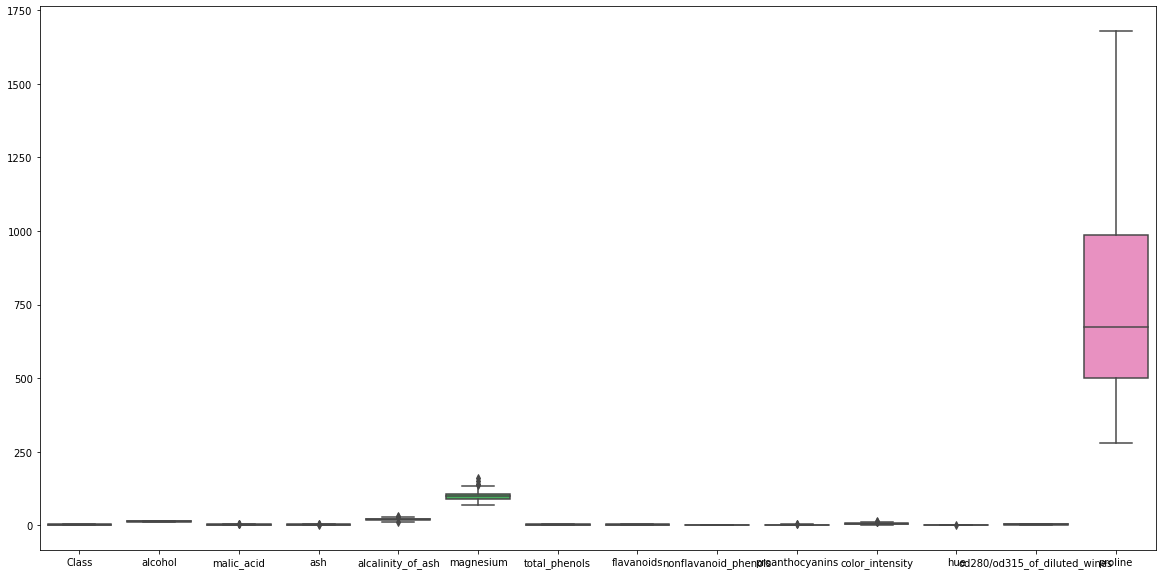

In [58]:
# Checking for outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient='v')
# magnesium feature contains outliers

135.5
(178, 14)


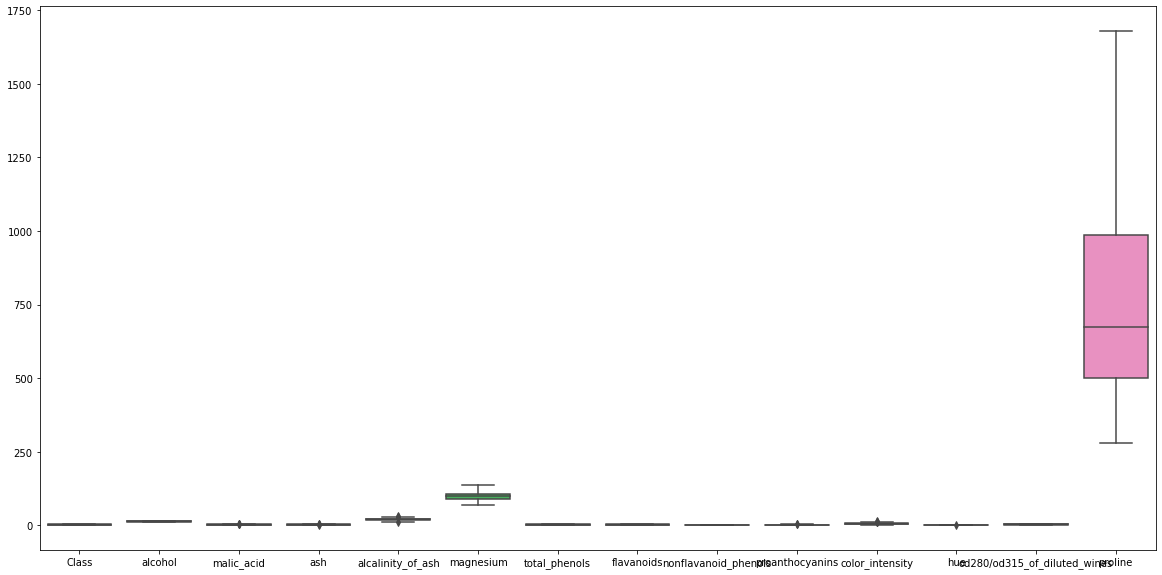

In [59]:
q75,q25=np.percentile(df['magnesium'],[75,25])
# Calculating IQR
iqr=q75-q25
whisker=q75+(1.5*iqr)
print(whisker)
#Capping the outliers to the upperwhisker value
df['magnesium']=df['magnesium'].clip(upper=whisker)
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
print(df.shape)

[1 2 3]


<AxesSubplot:xlabel='Class', ylabel='count'>

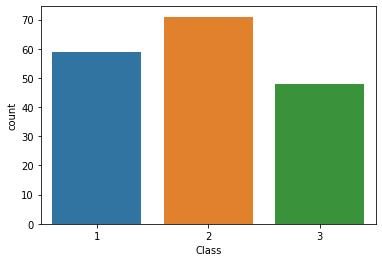

In [60]:
print(df['Class'].unique())
# Checking for balanced dataset
sns.countplot(df['Class'])
#Its not imbalanced dataset
        

<AxesSubplot:xlabel='total_phenols', ylabel='Density'>

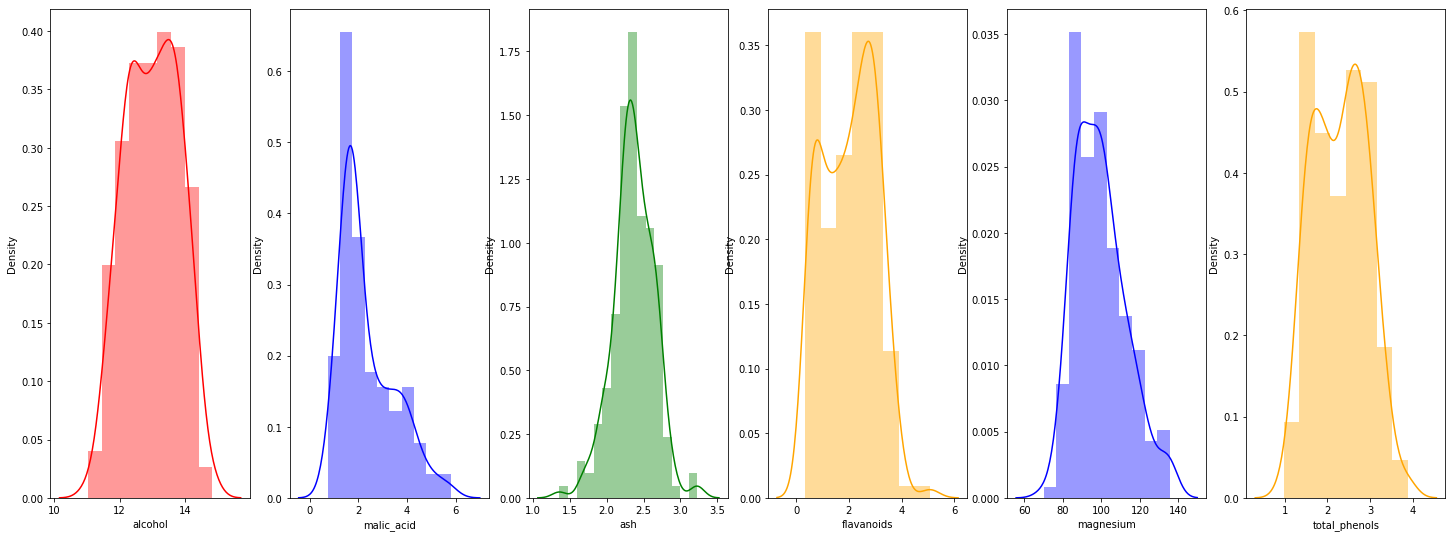

In [61]:
plt.figure(figsize=(25,9))
plt.subplot(1,6,1)
sns.distplot(df['alcohol'],color='red')

plt.subplot(1,6,2)
sns.distplot(df['malic_acid'],color='blue')

plt.subplot(1,6,3)
sns.distplot(df['ash'],color='green')

plt.subplot(1,6,4)
sns.distplot(df['flavanoids'],color='orange')
plt.subplot(1,6,5)
sns.distplot(df['magnesium'],color='blue')
plt.subplot(1,6,6)
sns.distplot(df['total_phenols'],color='orange')
# As we can see that here most features are skewed

<AxesSubplot:xlabel='proline', ylabel='Density'>

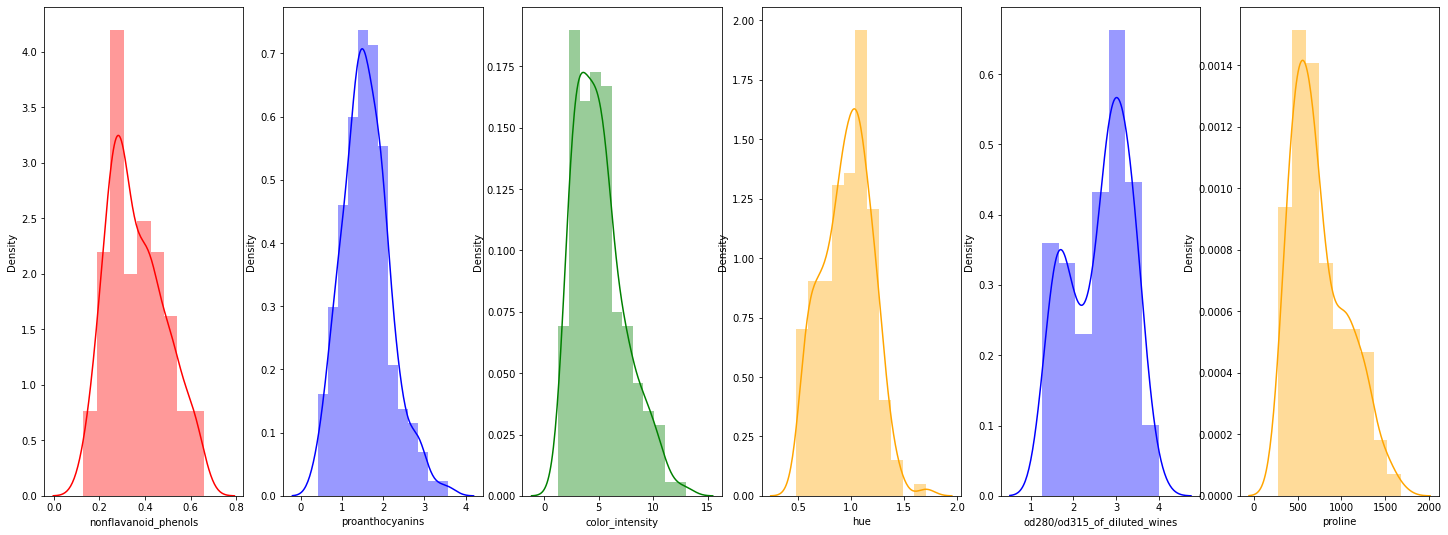

In [62]:
plt.figure(figsize=(25,9))
plt.subplot(1,6,1)
sns.distplot(df['nonflavanoid_phenols'],color='red')

plt.subplot(1,6,2)
sns.distplot(df['proanthocyanins'],color='blue')

plt.subplot(1,6,3)
sns.distplot(df['color_intensity'],color='green')

plt.subplot(1,6,4)
sns.distplot(df['hue'],color='orange')
plt.subplot(1,6,5)
sns.distplot(df['od280/od315_of_diluted_wines'],color='blue')
plt.subplot(1,6,6)
sns.distplot(df['proline'],color='orange')
#Most features are skewed here

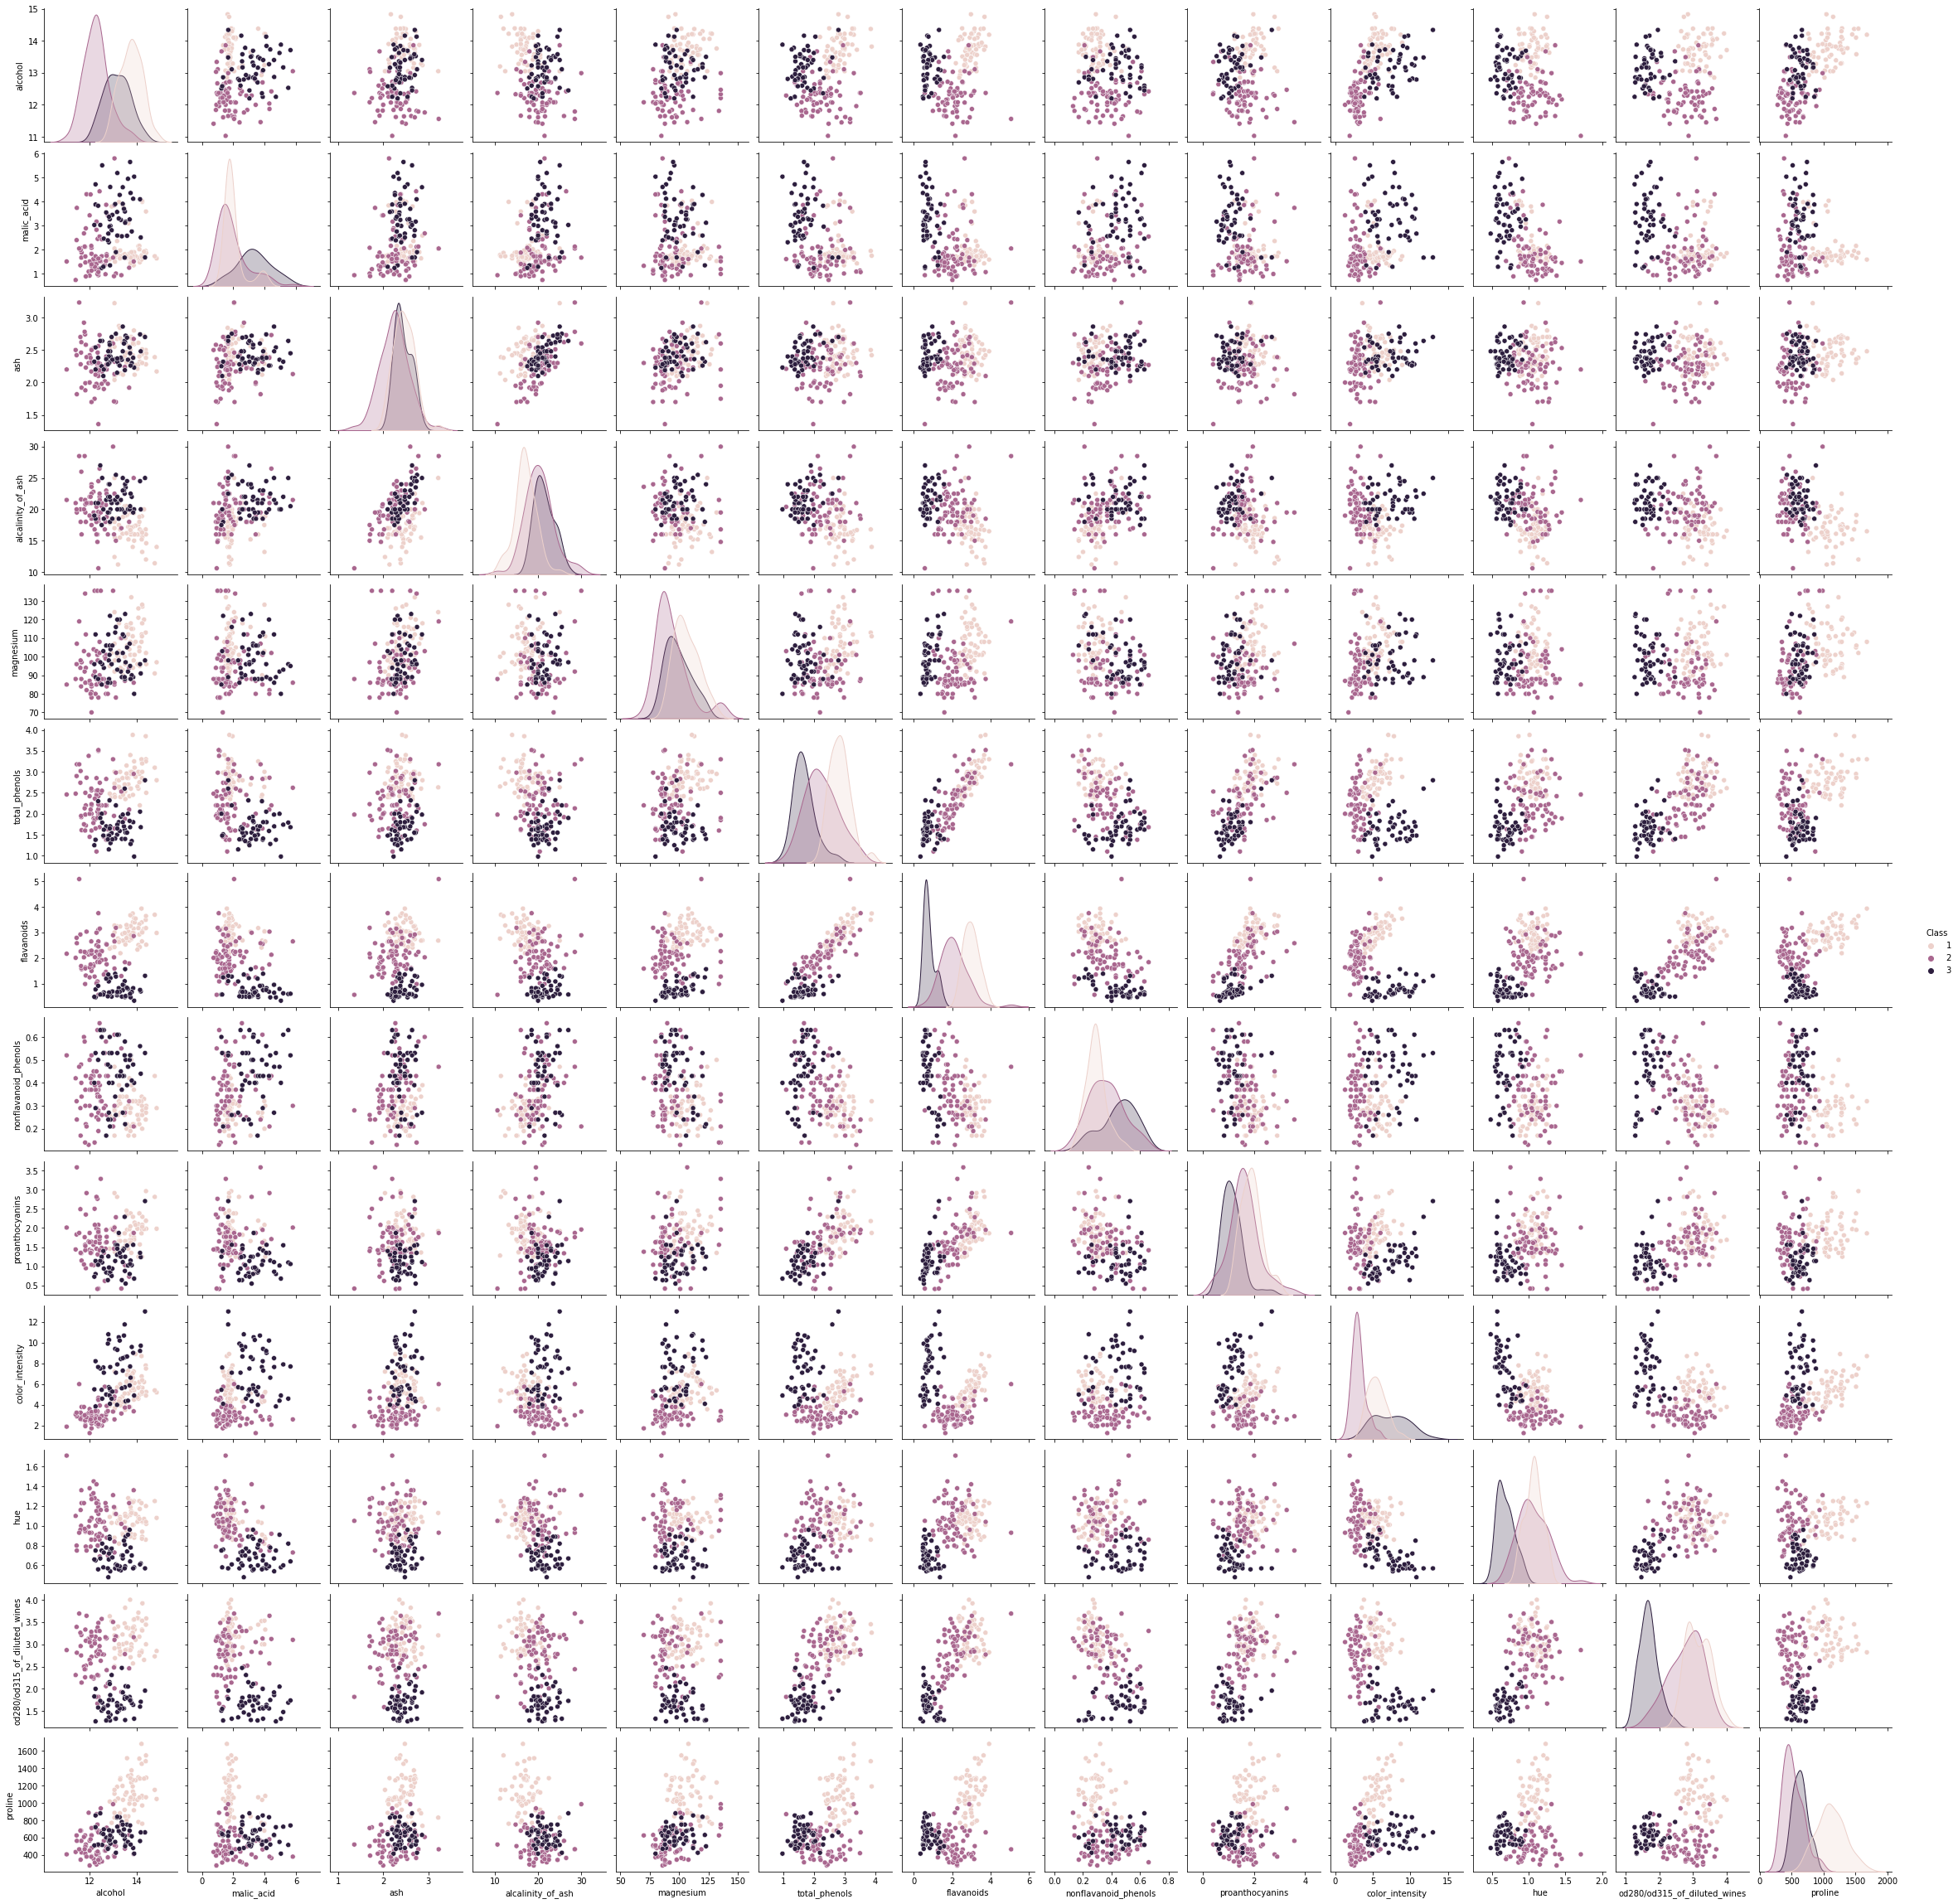

In [15]:
#Pairplot to see the dependency of features
sns.pairplot(data=df,hue='Class')

<AxesSubplot:>

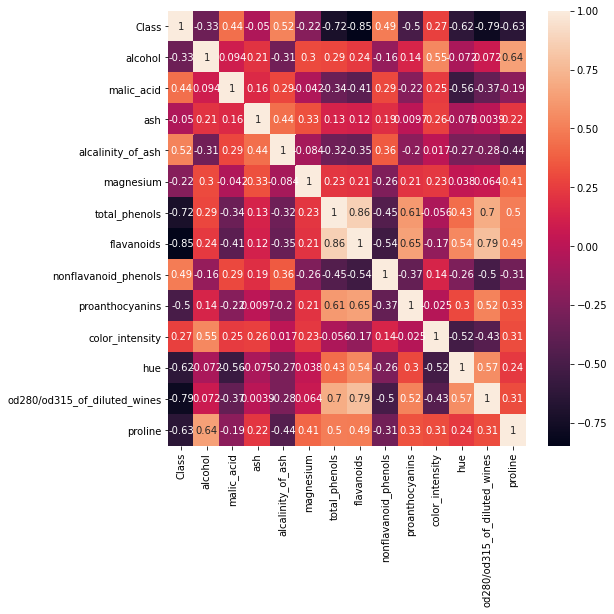

In [63]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
# here we can see that some featyres are more correlated to others.So perform PCA for dimensionality reduction

In [64]:
x=df.drop(columns=['Class'],axis=1)
y=df['Class']


In [73]:
#Splitting Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Standrization of features
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)

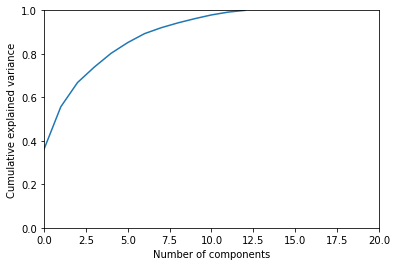

In [74]:
from sklearn.decomposition import PCA
pca = PCA()
# Fitting and transforming th data using PCA object.
pca.fit_transform(x)
#  the amount of variation Explained from the PCA components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,2)
plt.ylim(0,1,.1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
# here we can see that only 10 features gives more than 96% variance

In [75]:
# Fitting and transforming original data into pca components(x_pca)
pca=PCA(n_components=10)
pca.fit(x)
x_pca = pca.transform(x)
print("Transformed shape:", x_pca.shape)
x_pca_train,x_pca_test,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.3)

Transformed shape: (178, 10)


# Model Trainning

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Classification report for LR :
LR: 0.981481 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Classification report for SVM :
SVM: 0.981481 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00    

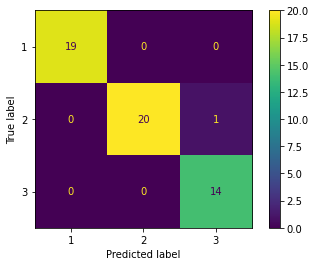

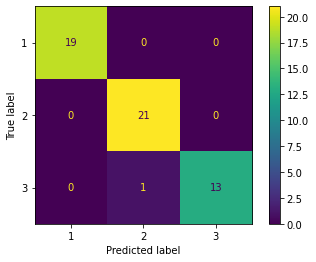

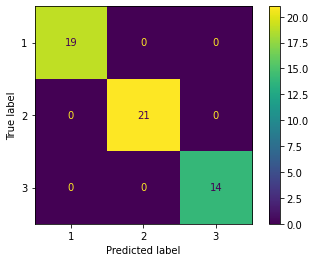

In [76]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
models = [('LR', LogisticRegression()),('SVM',SVC()),('NB',GaussianNB())]
names=[]
results=[]
for name,model in models:
          model.fit(x_train,y_train)
          pred=model.predict(x_test)
          test_score=accuracy_score(y_test,pred)
          print(plot_confusion_matrix(model,x_test,y_test))
          print(classification_report(y_test,pred))
          names.append(name)
          print("Classification report for {} :".format(name))
          print('%s: %f ' % (name, test_score))
# Here we can use differen t kernal for SVM but not required as linear kernal gives good result




# Trainning with PCA

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.97        18
           3       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Classification report for LR :
LR: 0.981481 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.97        18
           3       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Classification report for SVM :
SVM: 0.981481 
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.90      1.00    

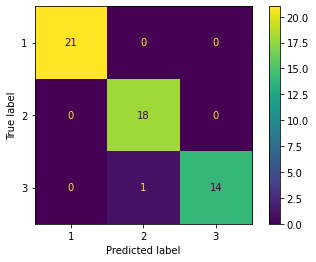

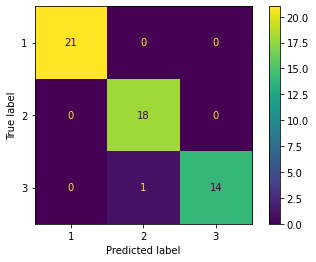

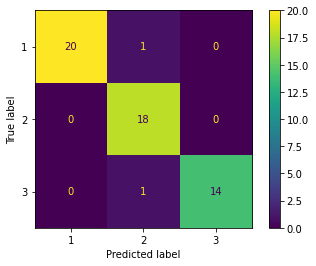

In [77]:
models = [('LR', LogisticRegression()),('SVM',SVC()),('NB',GaussianNB())]
names=[]
results=[]
for name,model in models:
          model.fit(x_pca_train,y_train_pca)
          pred=model.predict(x_pca_test)
          test_score=accuracy_score(y_test_pca,pred)
          print(plot_confusion_matrix(model,x_pca_test,y_test_pca))
          print(classification_report(y_test_pca,pred))
          names.append(name)
          print("Classification report for {} :".format(name))
          print('%s: %f ' % (name, test_score))